In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [30]:
n = 100
p = 9.68
d = 0
mass = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
for i in range(9):
    d += (mass[i] - 100/p)**2/(100/p)
d += (7 - 100*(p-9)/p)**2/(100*(p-9)/p)

t = []
for i in range(len(mass)):
    t.extend([i for j in range(mass[i])])

x = np.linspace(0, 9, 100)
y = [np.sum(t<i)/n for i in x]
y1 = np.array([i/10 for i in x])

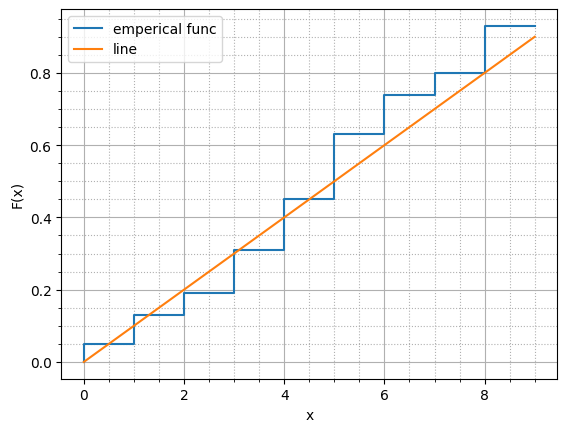

In [31]:
# Нарисуем эмпирическую функцию распределения


plt.step(x, y, label='emperical func')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

# Нарисуем прямую
plt.plot(x, y1, label='line')

plt.legend()

In [32]:
theta_1 = 5.27
theta_2 = 2.505

#Определим распределение критерия Колмогорова параметрическим бутстрапом
def bootstrap_par(n_bootstrap_samples=50000):
    return [np.random.normal(theta_1, theta_2, 100) for _ in range(n_bootstrap_samples)]

N = 50000
bootstrap_p = bootstrap_par()
bootstrap_result = []
for i in range(N):
  bootstrap_result.append([0] * 10)

for i in range(len(bootstrap_p)):
  for j in range(len(bootstrap_p[i])):

    if (bootstrap_p[i][j] > 9):
      bootstrap_p[i][j] = 9
    elif (bootstrap_p[i][j] < 0):
      bootstrap_p[i][j] = 0

for i in range(len(bootstrap_p)):
  for j in range(len(bootstrap_p[i])):
      bootstrap_result[i][int(bootstrap_p[i][j])] += 1



bootstrap_result = np.array(bootstrap_result)
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])

def normal (data):
  return scipy.stats.norm(theta_1, theta_2**2).cdf(data)


numbers = normal(numbers)

def emperic_func (data, numbers):
  res_list = [0]
  for i in range(len(data)):
    res_list.append(data[i] / 100 + res_list[len(res_list) - 1])
  res_res_list = []
  for i in range(len(res_list)):
    if i == 0:
      res_res_list.append(abs(numbers[0] - res_list[0]))
    if i == 9:
      res_res_list.append(abs(numbers[9] - res_list[10]))
    if i > 0 and i < 9:
      res_res_list.append(abs(numbers[i] - res_list[i]))
      res_res_list.append(abs(numbers[i - 1] - res_list[i]))
  return res_res_list


deltas = []
tmp = []
delta_with_wave = []

for i in range(len(bootstrap_result)):
  deltas = np.array(emperic_func(bootstrap_result[i], numbers))

  delta_with_wave.append(10 * np.max(deltas))


delta_with_wave.sort()

delta_with_wave_res = 10 * np.max(emperic_func(X, numbers))

print(f'delta_wave = {delta_with_wave_res}')

cnt_tmp = 0

while (delta_with_wave[cnt_tmp] < delta_with_wave_res):
  cnt_tmp += 1

print(f'p-value = {cnt_tmp / len(delta_with_wave)}')


delta_wave = 2.7611563666945935
p-value = 0.12212
